<table>
    <tr>
        <td><img src="./imagenes/Macc.png" width="400"/></td>
        <td>&nbsp;</td>
        <td>
            <h1 style="color:blue;text-align:left">Inteligencia Artificial</h1></td>
        <td>
            <table><tr>
            <tp><p style="font-size:150%;text-align:center">Notebook 10</p></tp>
            <tp><p style="font-size:150%;text-align:center">Redes Bayesianas</p></tp>
            </tr></table>
        </td>
    </tr>
</table>

---


# Objetivo

En este notebook estudiaremos una herramienta muy útil para representar situaciones de incertidumbre, como las que aparecen, por ejemplo, en el mundo del Wumpus, aunque el rango de aplicaciones es muy amplio. Esta herramienta se llama las **redes bayesianas** y está basada, como su nombre lo indica, en la regla de Bayes.


Adaptado de Russell & Norvig (2016), caps. 13 y 14.


# Secciones

* [Implementación de la estructura de una red bayesiana.](#estructura)
* [Inferencia probabilística y consultas basadas en evidencia.](#inferencia)
* [Ejemplos más interesantes.](#ejemplos)


# Estructura de una red bayesiana  <a class="anchor" id="estructura">

Una **red bayesiana** está basada en un grafo dirigido acíclico, en donde cada vértice está etiquetado con una tabla de probabilidad condicional en función de su ascendencia. Para la implementación aquí realizada, usaremos el paquete [`pyAgrum`](https://pyagrum.readthedocs.io/en/0.22.2/). 

In [1]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
gum.config['notebook','potential_visible_digits']=2

Nota: instalar `graphviz` con conda, no presenta problemas y no es necesario adicionar nada al PATH de windows.

Usaremos como ejemplo el razonamiento sobre los pozos en el mundo del Wumpus discutido en las diapositivas. Lo primero que debemos hacer es crear un objeto de clase `BayesNet`. En este ejemplo inicializaremos este objeto mediante el método `fastBN`, el cual permite incluir el grafo subyacente, toda vez que este es bastante sencillo:

In [4]:
bn=gum.fastBN('Pozo(2,0)->Brisa(1,0)<-Pozo(1,1)')
bn

(pyAgrum.BayesNet<double>@00000196E6981120) BN{nodes: 3, arcs: 2, domainSize: 8, dim: 12}

Debemos ahora incluir las probabilidades de los pozos y la probabilidad condicional de la brisa. Esto se realiza de la siguiente manera:

In [5]:
# probabilidades de los pozos
bn.cpt('Pozo(2,0)').fillWith([0.8,0.2])
bn.cpt('Pozo(1,1)').fillWith([0.8,0.2])

# tabla de probabilidad condicional
bn.cpt('Brisa(1,0)')[{'Pozo(2,0)': 1, 'Pozo(1,1)': 1}] = [0, 1]
bn.cpt('Brisa(1,0)')[{'Pozo(2,0)': 1, 'Pozo(1,1)': 0}] = [0, 1]
bn.cpt('Brisa(1,0)')[{'Pozo(2,0)': 0, 'Pozo(1,1)': 1}] = [0, 1]
bn.cpt('Brisa(1,0)')[{'Pozo(2,0)': 0, 'Pozo(1,1)': 0}] = [1, 0]

Y se visualiza bonito de la siguiente manera:

In [6]:
gnb.sideBySide(bn.cpt('Pozo(2,0)'),
               gnb.getBN(bn),
               bn.cpt('Pozo(1,1)'))
gnb.sideBySide(bn.cpt('Brisa(1,0)'),captions=['$P(Brisa_{(1,0)}|Pozo_{(2,0)},Pozo_{(1,1)})$'])

# Consultas <a class="anchor" id="inferencia">

Con esta red bayesiana podemos resolver consultas sobre cualquier cálculo de probabilidades en este escenario. Las consultas consisten en saber cuál es la probabilidad de que una variable (o variables) tomen un valor (o valores) determinados.

Para realizar una consulta, es necesario crear un objeto de consulta mediante el método `LazyPropagation`:

In [7]:
ie=gum.LazyPropagation(bn)

Consideraremos dos tipos de consultas. El primero es cuando no hay evidencia disponible. En este caso, la respuesta a la consulta es simplemente la probabilidad **marginal** de que las variables tomen los valores respectivos. 

Por ejemplo, podemos consultar la probabilidad de que haya un pozo en $(2,0)$ de la siguiente manera:

In [8]:
ie.makeInference()
ie.posterior('Pozo(2,0)')

(pyAgrum.Potential<double>@00000196E65CEE20) 
  Pozo(2,0)        |
0        |1        |
---------|---------|
 0.8000  | 0.2000  |

El segundo tipo es cuando hay evidencia disponible $E$ (que viene dada en forma de un diccionario `{variable:valor}`). Aquí, la respuesta a la consulta es la probabilidad **condicional** de que las variables tomen los valores respectivos dada la evidencia. La evidencia se guardará mediante el método `setEvidence`. Por ejemplo, suponga que la evidencia es que hay brisa en $(1,0)$. La evidencia en este caso se guarda de la siguiente manera:

In [9]:
ie.setEvidence({'Brisa(1,0)':1})

Y volvemos a hacer la consulta:

In [10]:
ie.makeInference()
ie.posterior('Pozo(2,0)')

(pyAgrum.Potential<double>@00000196E65CF120) 
  Pozo(2,0)        |
0        |1        |
---------|---------|
 0.4444  | 0.5556  |

La librería pyAgrum es muy flexible y viene con métodos muy interesantes para visualización. Por ejemplo, podemos visualizar lado a lado las probabilidades a priori y a posteriori de $Pozo_{(2,0)}$:

Probabilidad a priori:


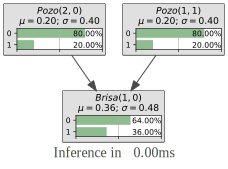

Probabilidad a posteriori:


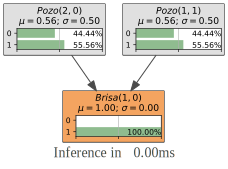

In [11]:
print("Probabilidad a priori:")
gnb.showInference(bn,evs={})
print("Probabilidad a posteriori:")
gnb.showInference(bn,evs={'Brisa(1,0)':1})

# Ejemplos <a class="anchor" id="ejemplos">
    
### Más Wumpus
    
Vamos a resolver ahora el ejemplo del mundo del Wumpus con el que terminamos las diapositivas de clase:
    
<img src="./imagenes/pozos.png" width="450">
    
Para poder hacer este cálculo, debemos crear la red bayesiana respectiva, representada en el siguiente diagrama:
    
<img src="./imagenes/rb1.png" width="600">   
    
Para ilustrar otros métodos de creación de redes bayesianas en PyAgrum, vamos a utilizar la misma red que ya teníamos, y le vamos a añadir los nodos, aristas y probabilidades que hacen falta.
    


In [12]:
variables = ['Pozo(0,2)', 'Brisa(0,1)']
for var in variables:
    bn.add(var, 2) # <= aquí el 2 es el número de posibles valores

bn

(pyAgrum.BayesNet<double>@00000196E6981120) BN{nodes: 5, arcs: 2, domainSize: 32, dim: 16}

Añadimos las aristas:

In [13]:
bn.addArc('Pozo(1,1)','Brisa(0,1)')
bn.addArc('Pozo(0,2)','Brisa(0,1)')
bn

(pyAgrum.BayesNet<double>@00000196E6981120) BN{nodes: 5, arcs: 4, domainSize: 32, dim: 22}

Y añadimos las probabilidades:

In [27]:
bn.cpt('Pozo(0,2)').fillWith([0.8,0.2])
bn.cpt('Brisa(0,1)')[{'Pozo(1,1)': 1, 'Pozo(0,2)': 1}] = [0, 1]
bn.cpt('Brisa(0,1)')[{'Pozo(1,1)': 1, 'Pozo(0,2)': 0}] = [0, 1]
bn.cpt('Brisa(0,1)')[{'Pozo(1,1)': 0, 'Pozo(0,2)': 1}] = [0, 1]
bn.cpt('Brisa(0,1)')[{'Pozo(1,1)': 0, 'Pozo(0,2)': 0}] = [1, 0]

In [28]:
gnb.sideBySide(bn.cpt('Pozo(0,2)'), bn.cpt('Pozo(1,1)'), bn.cpt('Pozo(2,0)')),
gnb.sideBySide(gnb.getBN(bn)),
gnb.sideBySide(bn.cpt('Brisa(0,1)'),
               gnb.sideBySide(captions=['']),
               bn.cpt('Brisa(1,0)'),
               captions=['$P(Brisa_{(0,1)}|Pozo_{(0,2)},Pozo_{(1,1)})$', '', '$P(Brisa_{(1,0)}|Pozo_{(2,0)},Pozo_{(1,1)})$'])


"G <!-- Pozo(2,0) --> Pozo(2,0) Pozo(2,0) <!-- Brisa(1,0) --> Brisa(1,0) Brisa(1,0) <!-- Pozo(2,0)->Brisa(1,0) --> Pozo(2,0)->Brisa(1,0) <!-- Brisa(0,1) --> Brisa(0,1) Brisa(0,1) <!-- Pozo(0,2) --> Pozo(0,2) Pozo(0,2) <!-- Pozo(0,2)->Brisa(0,1) --> Pozo(0,2)->Brisa(0,1) <!-- Pozo(1,1) --> Pozo(1,1) Pozo(1,1) <!-- Pozo(1,1)->Brisa(1,0) --> Pozo(1,1)->Brisa(1,0) <!-- Pozo(1,1)->Brisa(0,1) --> Pozo(1,1)->Brisa(0,1)"


""
""


In [42]:
ie=gum.LazyPropagation(bn)
ie.setEvidence({'Brisa(1,0)':1, 'Brisa(0,1)':1})
ie.makeInference()
ie.posterior('Pozo(1,1)')

(pyAgrum.Potential<double>@00000196E7455A40) 
  Pozo(1,1)        |
0        |1        |
---------|---------|
 0.1379  | 0.8621  |

Probabilidad a priori:


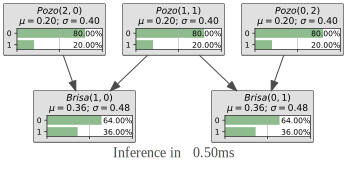

Probabilidad a posteriori incluyendo Brisa(1,0):


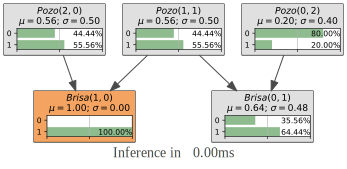

Nueva probabilidad a posteriori incluyendo Brisa(1,0)' y 'Brisa(0,1)


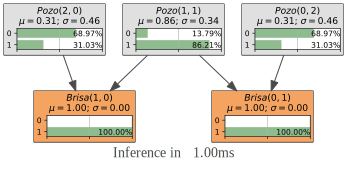

In [20]:
print("Probabilidad a priori:")
gnb.showInference(bn,evs={})
print("Probabilidad a posteriori incluyendo Brisa(1,0):")
gnb.showInference(bn,evs={'Brisa(1,0)':1})
print("Nueva probabilidad a posteriori incluyendo Brisa(1,0)' y 'Brisa(0,1)")
gnb.showInference(bn,evs={'Brisa(1,0)':1, 'Brisa(0,1)':1})

Aquí se pueden observar cosas muy interesantes. Por ejemplo, note que la probabilidad de $Pozo_{(2,0)}$ comienza en su valor original de 0.2. Al incluir la evidencia $Brisa_{(1,0)}$ la probabilidad de $Pozo_{(2,0)}$ aumenta a 0.56, pero luego disminuye a 0,31 cuando incluimos la evidencia de $Brisa_{(0,1)}$.

**Ejercicio 1:**

Suponga que, después de todo, en la casilla $(0,1)$ no había un pozo. ¿Cuál es la probabilidad a posteriori de $Pozo_{(2,0)}$? Es decir, hay que encontrar:

$$P(Pozo_{(2,0)}|Brisa_{(1,0)},\neg Brisa_{(0,1)})$$

Utilice el método `chgEvidence(variable,valor)` para cambiar la evidencia.

La respuesta debe ser:

<img src="./imagenes/posterior.png" width="100"> 

In [43]:
ie.chgEvidence('Brisa(0,1)',0)
ie.makeInference()
ie.posterior('Pozo(2,0)')

(pyAgrum.Potential<double>@00000196E7455C20) 
  Pozo(2,0)        |
0        |1        |
---------|---------|
 0.0000  | 1.0000  |

---

### Regar el jardín

Considere la siguiente situación. Para tener un bonito jardín, es necesario que este esté húmedo la mayor parte del tiempo. La rutina diaria de María es chequear el clima. Si está nublado, usualmente no prende el roceador automático del jardín. Si no está nublado, a veces sí y a veces no lo prende. Si el roceador está funcionando o si llueve, el jardín estará mojado. Estas relaciones se ven reflejadas en la siguiente red bayesiana:

<img src="./imagenes/jardin.png" width="650">

Para hacer inferencias probabilisticas sobre esta situación, creamos el objeto `BayesNet`. Vamos a inicializar el grafo dirigido acíclico de manera rápida mediante la siguiente celda:

In [53]:
bn=gum.fastBN("Nublado->Roceador->JardinMojado<-Lluvia<-Nublado")
bn

(pyAgrum.BayesNet<double>@00000196E697EE40) BN{nodes: 4, arcs: 4, domainSize: 16, dim: 18}

**Ejercicio 2:**

Asigne las probabilidades de cada uno de los nodos y dibuje la red correspondiente:

In [54]:
# AQUI PROBABILIDADES PARA LA VARIABLE Nublado
bn.cpt('Nublado').fillWith([0.5,0.5])

# AQUI PROBABILIDADES PARA LA VARIABLE Roceador
bn.cpt('Roceador')[{'Nublado': 1}] = [0.9, 0.1]
bn.cpt('Roceador')[{'Nublado': 0}] = [0.5, 0.5]

# AQUI PROBABILIDADES PARA LA VARIABLE Lluvia
bn.cpt('Lluvia')[{'Nublado': 1}] = [0.2, 0.8]
bn.cpt('Lluvia')[{'Nublado': 0}] = [0.8, 0.2]

# AQUI PROBABILIDADES PARA LA VARIABLE JardinMojado
bn.cpt('JardinMojado')[{'Lluvia': 1, 'Roceador': 1}] = [0.01, 0.99]
bn.cpt('JardinMojado')[{'Lluvia': 1, 'Roceador': 0}] = [0.1, 0.9]
bn.cpt('JardinMojado')[{'Lluvia': 0, 'Roceador': 1}] = [0.1, 0.9]
bn.cpt('JardinMojado')[{'Lluvia': 0, 'Roceador': 0}] = [1, 0]



Al correr la celda de código a continuación, se debe obtener lo siguiente:

<img src="./imagenes/jardin1.png" width="600">

In [55]:
gnb.sideBySide(bn.cpt('Nublado'))
gnb.sideBySide(
  gnb.getSideBySide(bn.cpt('Roceador')),
  gnb.getBN(bn,size="3!"),
  gnb.getSideBySide(bn.cpt('Lluvia')))
gnb.sideBySide(bn.cpt('JardinMojado'))

---

**Ejercicio 3:**

Utilice un objeto `LazyPropagation` y los métodos `makeInference`, `posterior` y `setEvidence` para responder las siguientes preguntas sobre la situación del jardín:

* ¿Cuál es la probabilidad de que el jardín esté mojado? $P(JardinMojado)$
* Dado que está nublado, ¿cuál es la probabilidad de que el jardín esté mojado? $P(JardinMojado|Nublado)$
* Dado que el jardín está mojado, cuál es la probabilidad de que el roceador esté encendido? $P(Roceador|JardinMojado)$

Observe que al correr la celda a continuación se debe obtener la siguiente respuesta:

<img src="./imagenes/jardin2.png" width="600">

**Crea objeto LazyPropagation**

In [56]:
# crea objeto LazyPropagation
ie=gum.LazyPropagation(bn)

**¿Cuál es la probabilidad de que el jardín esté mojado? $P(JardinMojado)$**

In [57]:
ie.makeInference()
ie.posterior('JardinMojado')

(pyAgrum.Potential<double>@00000196E7179940) 
  JardinMojado     |
0        |1        |
---------|---------|
 0.3529  | 0.6471  |

**Dado que está nublado, ¿cuál es la probabilidad de que el jardín esté mojado? $P(JardinMojado|Nublado)$**

In [58]:
ie.setEvidence({'Nublado':1})
ie.makeInference()
ie.posterior('JardinMojado')

(pyAgrum.Potential<double>@00000196E717A040) 
  JardinMojado     |
0        |1        |
---------|---------|
 0.2548  | 0.7452  |

**Dado que el jardín está mojado, cuál es la probabilidad de que el roceador esté encendido? $P(Roceador|JardinMojado)$**

In [59]:
ie.setEvidence({'JardinMojado':1})
ie.makeInference()
ie.posterior('Roceador')

(pyAgrum.Potential<double>@00000196E717A360) 
  Roceador         |
0        |1        |
---------|---------|
 0.5702  | 0.4298  |

Probabilidad de que el jardín esté mojado:


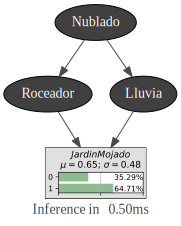

Probabilidad de que el jardín esté mojado dado que está nublado:


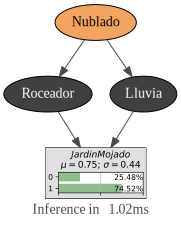

Probabilidad de que el roceador esté encendido dado que el jardín está mojado:


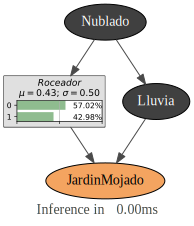

In [60]:
print('Probabilidad de que el jardín esté mojado:')
gnb.showInference(bn,evs={},targets={'JardinMojado'})
print('Probabilidad de que el jardín esté mojado dado que está nublado:')
gnb.showInference(bn,evs={'Nublado':1},targets={'JardinMojado'})
print('Probabilidad de que el roceador esté encendido dado que el jardín está mojado:')
gnb.showInference(bn,evs={'JardinMojado':1},targets={'Roceador'})

Las probabilidades solicitadas son:

* $P(JardinMojado)=0.65$
* $P(JardinMojado|Nublado)=0.75$
* $P(Roceador|JardinMojado)=0.43$

---

### Alarma antirobos

Usted ha instalado un sistema de alarma para su casa, el cual es muy confiable para detectar robos, pero en ciertas ocasiones también responde a terremotos leves. Usted tiene dos vecinos, Juan y María, que han prometido llamarlo a su trabajo cuando escuchen la alarma. Juan casi siempre llama cuando escucha la alarma, pero a veces confunde el sonido del teléfono con la alarma y hará la llamada. Por otro lado, María escucha música a todo volumen y por eso algunas veces no escucha la alarma. Las probabilidades y dependencias de esta situación se pueden representar mediante la siguiente red bayesiana:

<img src="./imagenes/alarma.png" width="600">

**Ejercicio 4:**

Implemente la red bayesiana correspondiente a esta situación y dibuje la red.

**Dibuja la red**

In [123]:
# genera la red
gum.config['notebook','potential_visible_digits'] = 3 

bn=gum.fastBN("Robo->Alarma<-Temblor")

variables = ['JuanLlama', 'MariaLlama']
for var in variables:
    bn.add(var, 2) # <= aquí el 2 es el número de posibles valores

bn.addArc('Alarma', 'JuanLlama')
bn.addArc('Alarma', 'MariaLlama')
bn

(pyAgrum.BayesNet<double>@00000196E744D4D0) BN{nodes: 5, arcs: 4, domainSize: 32, dim: 20}

**Añade probabilidades**

In [124]:
# añade probabilidades

# probabilidad robo
bn.cpt('Robo').fillWith([0.999,0.001])

# probabilidad temblor
bn.cpt('Temblor').fillWith([0.998,0.002])

# probabilidad JuanLlama
bn.cpt('JuanLlama')[{'Alarma': 1 }] = [0.1, 0.9]
bn.cpt('JuanLlama')[{'Alarma': 0 }] = [0.05, 0.95]

# Probabilidad MariaLlama
bn.cpt('MariaLlama')[{'Alarma': 1 }] = [0.3, 0.7]
bn.cpt('MariaLlama')[{'Alarma': 0 }] = [0.99, 0.01]

# Probabilidad Alarma
bn.cpt('Alarma')[{'Robo': 1, 'Temblor': 1}] = [0.05, 0.95]
bn.cpt('Alarma')[{'Robo': 1, 'Temblor': 0}] = [0.06, 0.94]
bn.cpt('Alarma')[{'Robo': 0, 'Temblor': 1}] = [0.71, 0.29]
bn.cpt('Alarma')[{'Robo': 0, 'Temblor': 0}] = [0.999, 0.001]

**Dibuja la red con las tablas de probabilidad condicional**

In [133]:
# dibuja laa red con la tablas de probabilidad condicional
gnb.sideBySide(bn.cpt('Robo'), bn.cpt('Temblor')), 
gnb.sideBySide(gnb.sideBySide(captions=['']), gnb.getBN(bn, size = '4!'), bn.cpt('Alarma')), 
gnb.sideBySide(bn.cpt('JuanLlama'), bn.cpt('MariaLlama'))

""
""


---

**Ejercicio 5:**
    
Utilice la red bayesiana para determinar las siguientes probabilidades

* Probabilidad de que suene la alarma.
* Probabilidad de que haya un robo dado que Juan y María llaman.

**Crea objeto LazyPropagation**

In [126]:
ie=gum.LazyPropagation(bn)

**Probabilidad de que suene la alarma**

In [127]:
ie.makeInference()
ie.posterior('Alarma')

(pyAgrum.Potential<double>@00000196E7317410) 
  Alarma           |
0        |1        |
---------|---------|
 0.9975  | 0.0025  |

**Probabilidad de que haya un robo dado que Juan y María llaman**

In [132]:
ie.setEvidence({'JuanLlama':1, 'MariaLlama': 1})
ie.makeInference()
ie.posterior('Robo')

(pyAgrum.Potential<double>@00000196E73176B0) 
  Robo             |
0        |1        |
---------|---------|
 0.9464  | 0.0536  |

Las probabilidades son las siguientes:

* $P(Alarma)=0.003$
* $P(Robo|JuanLlama, MariaLlama)=0.176$

---

En este notebook usted aprendió:

* Implementar redes bayesianas mediante el paquete `pyAgrum`.
* Realizar inferencias sobre probabilidades con o sin evidencia adicional mediante redes bayesianas.